In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
from scipy.io.arff import loadarff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Part B

In [2]:
# (i)
# from https://stackoverflow.com/questions/46401209/how-to-convert-the-arff-object-loaded-from-a-arff-file-into-a-dataframe-format
raw = loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(raw[0])
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


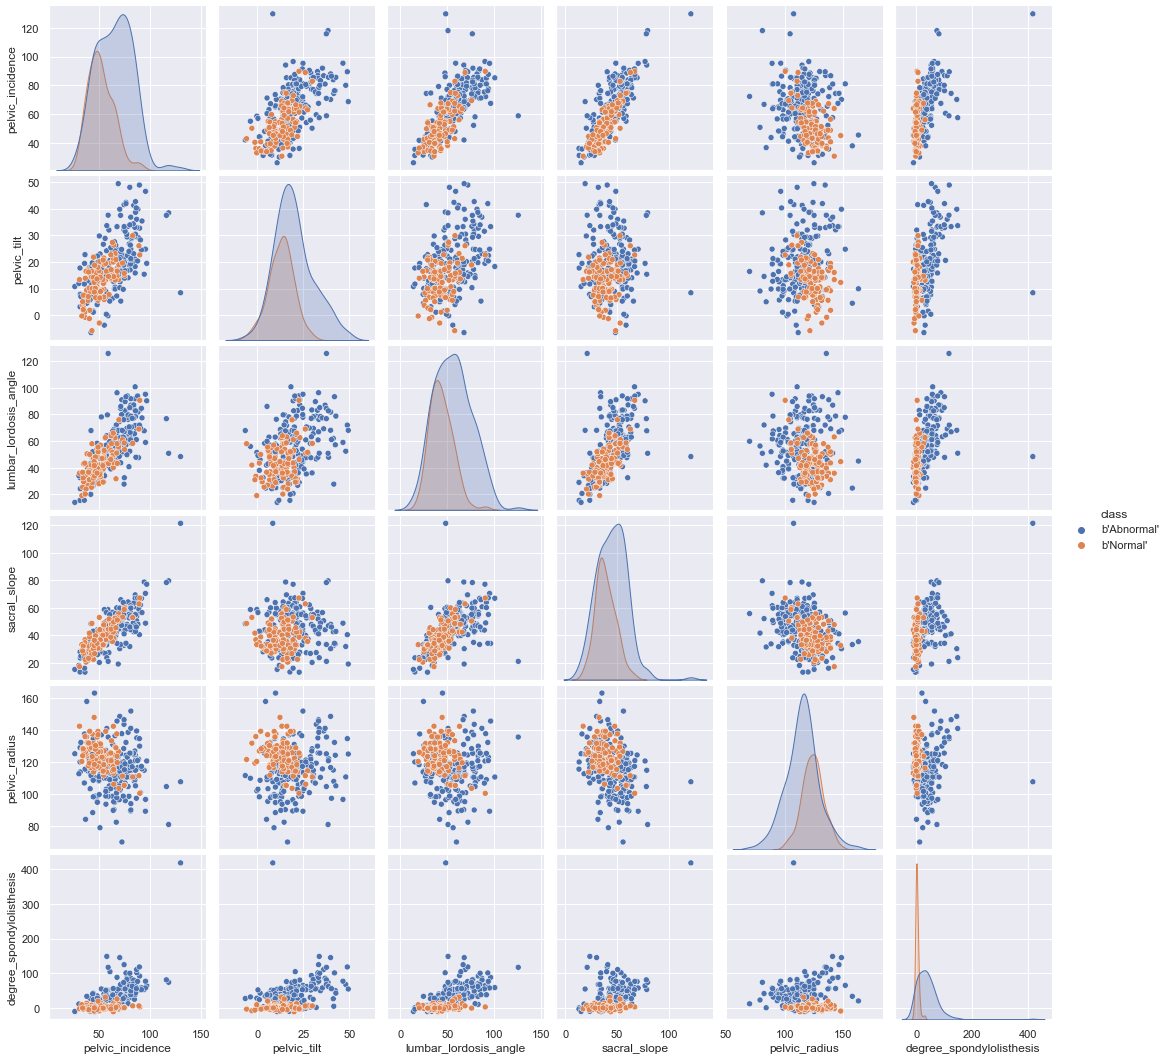

In [41]:
# Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
sns.pairplot(df, hue="class")

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

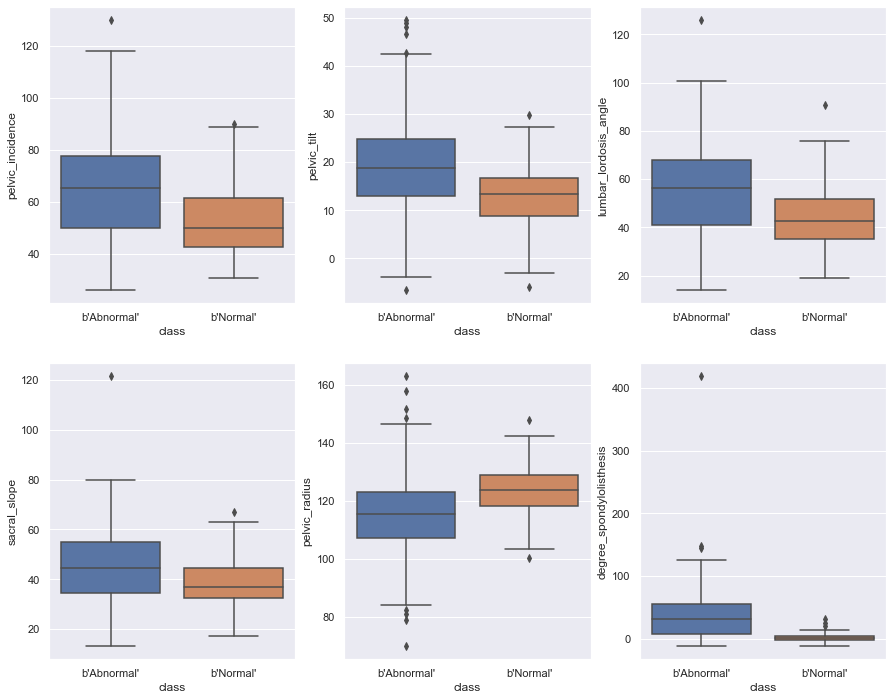

In [42]:
# ii. 
# Make boxplots for each of the independent variables.
sns.set(rc={'figure.figsize':(15,12)})
fig, ax =plt.pyplot.subplots(2,3)
sns.boxplot(x=df['class'], y= df['pelvic_incidence'], data=df, ax=ax[0][0])
sns.boxplot(x=df['class'], y= df['pelvic_tilt'], data=df, ax=ax[0][1])
sns.boxplot(x=df['class'], y= df['lumbar_lordosis_angle'], data=df, ax=ax[0][2])
sns.boxplot(x=df['class'], y= df['sacral_slope'], data=df, ax=ax[1][0])
sns.boxplot(x=df['class'], y= df['pelvic_radius'], data=df, ax=ax[1][1])
sns.boxplot(x=df['class'], y= df['degree_spondylolisthesis'], data=df, ax=ax[1][2])


In [43]:
# iii.
# Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data 
# as the test set.

original_train_set = pd.DataFrame(columns=df.columns.tolist())
original_test_set = pd.DataFrame(columns=df.columns.tolist())
abnormal_count = 0
normal_count = 0
cols = df.columns.tolist()

for index, row in df.iterrows():
    if row[6] == b'Abnormal' and abnormal_count < 140:
        temp_dict = {}
        for j, item in enumerate(row):
            temp_dict[cols[j]] = item
        original_train_set = original_train_set.append(temp_dict, ignore_index=True)
        abnormal_count += 1
    elif row[6] == b'Normal' and normal_count < 70:
        temp_dict = {}
        for j, item in enumerate(row):
            temp_dict[cols[j]] = item
        original_train_set = original_train_set.append(temp_dict, ignore_index=True)
        normal_count += 1
    else:
        temp_dict = {}
        for j, item in enumerate(row):
            temp_dict[cols[j]] = item
        original_test_set = original_test_set.append(temp_dict, ignore_index=True)

original_test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,b'Abnormal'
1,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,b'Abnormal'
2,85.290173,18.278890,100.744220,67.011283,110.660701,58.884948,b'Abnormal'
3,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,b'Abnormal'
4,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,b'Abnormal'
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [44]:
original_train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
205,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,b'Normal'
206,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,b'Normal'
207,65.756348,13.206926,44.000000,52.549422,129.393573,-1.982120,b'Normal'
208,40.413366,-1.329412,30.982768,41.742778,119.335655,-6.173675,b'Normal'


# Part C

In [45]:
# Test all the data in the test database with k nearest neighbors.
x_train = original_train_set.drop(columns=['class'])
encoder = preprocessing.LabelEncoder()
encoder.fit(original_train_set["class"])
original_train_set["class"] = encoder.transform(original_train_set["class"])

x_test = original_test_set.drop(columns=['class'])
encoder.fit(original_test_set["class"])
y_test = encoder.transform(original_test_set['class'])
y_train = original_train_set["class"]

test_errors = []
train_errors = []

for k in range(208, 0, -1):
    train_classifier = KNeighborsClassifier(n_neighbors=k) # default is euclidean distance
    train_classifier.fit(x_train, y_train)
    train_classifier.predict(x_train)
    train_errors.append(1-train_classifier.score(x_train, y_train))
    
    test_classifier = KNeighborsClassifier(n_neighbors=k) # default is euclidean distance
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    test_errors.append(1-test_classifier.score(x_test, y_test))

print(test_errors)
print(train_errors)

[0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.3000000000

(218.35, -9.350000000000001)

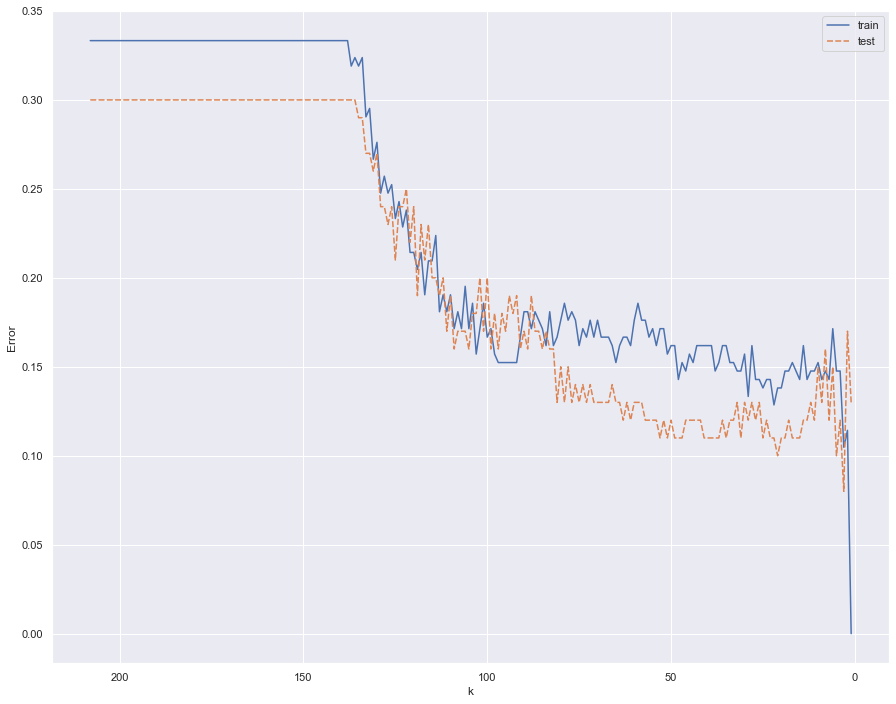

In [46]:
# Plot train and test errors in terms of k (descending order)

error_df = pd.DataFrame(list(zip(train_errors, test_errors)), columns =['train', 'test'])
error_df["k"] = [k for k in range(208, 0, -1)]
error_df.set_index("k", inplace=True)

plot = sns.lineplot(data=error_df)
plot.set(xlabel = "k", ylabel = "Error")
plot.set_xlim(plot.get_xlim()[::-1]) # from https://stackoverflow.com/questions/23330484/descend-x-axis-values-using-matplotlib

In [47]:
# Which k∗ is the most suitable k among those values?
np.argmin(test_errors)

205

- Since the test error is smallest at k = 3 (208-205=3), this is the best value of k. 

In [48]:
# Calculate the confusion matrix when k = k*
y_true = y_test

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True Positive Rate: {tp/(tp + fn)}")
print(f"True Negative Rate: {tn/(tn + fp)}")
print(f"Precision: {tp/(tp + fp)}")
print(f"F1 Score: {tp/(tp + .5*(fn + fp))}")

True Positive Rate: 0.7666666666666667
True Negative Rate: 0.9857142857142858
Precision: 0.9583333333333334
F1 Score: 0.8518518518518519


| True Negatives | False Positive |
|----------------|----------------|
| False Negative | True Positive  |

-  True positive rate = True Positive/(True Positive + False negative)
    - TP = 23 / (23+7) = 76.67%
- True negative rate = TN/TN+FP
    - TN = 69/(69+1) = 98.57%
- Precision = True Positives / (True Positives + False Positives)
    - precision = 23/(23+1) = 95.83%
-  $$ F1 Score = {TP \over TP + \frac{1}{2}(FN + FP)}.$$
    - $$ F1 Score = {23 \over 23 + \frac{1}{2}(7 + 1)}.$$
    - $$ F1 Score = .8519 $$
    

In [49]:
# iii. 
def get_test_error(train_size, distance_type):
    train_set = pd.DataFrame(columns=df.columns.tolist())
    abnormal_count = 0
    normal_count = 0
    cols = df.columns.tolist()
    
    # assemble training and testing samples
    for index, row in df.iterrows():
        if row[6] == b'Abnormal' and abnormal_count < (2*train_size)/3:
            temp_dict = {}
            for j, item in enumerate(row):
                temp_dict[cols[j]] = item
            train_set = train_set.append(temp_dict, ignore_index=True)
            abnormal_count += 1
        elif row[6] ==  b'Normal' and normal_count < train_size/3:
            temp_dict = {}
            for j, item in enumerate(row):
                temp_dict[cols[j]] = item
            train_set = train_set.append(temp_dict, ignore_index=True)
            normal_count += 1

    x_train = train_set.drop(columns=['class'])
    encoder = preprocessing.LabelEncoder()
    encoder.fit(train_set["class"])
    train_set["class"] = encoder.transform(train_set["class"])
    y_train = train_set["class"]

    
    x_test = original_test_set.drop(columns=['class'])
    encoder.fit(original_test_set["class"])
    y_test = encoder.transform(original_test_set['class'])

    test_errors = []
    train_errors = []
    
    # calculate test errors
    for k in range(1, train_size-3, 5):
        if isinstance(distance_type, int) or isinstance(distance_type, float):
            test_classifier = KNeighborsClassifier(n_neighbors=k, p=distance_type)
            test_classifier.fit(x_train, y_train)
            test_classifier.predict(x_test)
            test_errors.append(1-test_classifier.score(x_test, y_test))
        else:
            test_classifier = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric=distance_type,
                                                  metric_params={'VI': np.cov(x_train, rowvar=False)})
            test_classifier.fit(x_train, y_train)
            test_classifier.predict(x_test)
            test_errors.append(1-test_classifier.score(x_test, y_test))
    
    return test_errors[np.argmin(test_errors)]
    

In [ ]:
best_test_errors = []
# get test errors for each training set size
for i in range(10, 211, 10):
    best_test_errors.append(get_test_error(i, 2))
print(best_test_errors)

In [ ]:
error_df = pd.DataFrame(best_test_errors, index=list(range(10, 211, 10)))
error_df["train_size"] = list(range(10, 211, 10))
error_df.rename(columns={0: 'test_error'}, inplace=True)

plot = sns.lineplot(data=error_df, x="train_size", y="test_error")
plot.set(xlabel = "# of observations in training set", ylabel = "Test Error")

# Part C

In [ ]:
manhattan_errors = get_test_error(210, 1)

print(manhattan_errors)


In [ ]:
# chebyshev
x_train = original_train_set.drop(columns=['class'])
encoder = preprocessing.LabelEncoder()
encoder.fit(original_train_set["class"])
original_train_set["class"] = encoder.transform(original_train_set["class"])
y_train = original_train_set["class"]


x_test = original_test_set.drop(columns=['class'])
encoder.fit(original_test_set["class"])
y_test = encoder.transform(original_test_set['class'])

chebyshev_errors = []
train_errors = []

# calculate error
for k in range (1, 211):
    test_classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    chebyshev_errors.append(1-test_classifier.score(x_test, y_test))

chebyshev_errors
print(chebyshev_errors[np.argmin(chebyshev_errors)])

In [ ]:
mahalanobis_errors = []
mahalanobis_errors.append(get_test_error(210, 'mahalanobis'))
    
print(mahalanobis_errors)

In [ ]:
# log10(p)
log_errors = []
log_p_values = np.linspace(.1, 1, 10)
i = 0
for p in log_p_values:
#     log_errors.append(get_test_error(210, pow(10, p)))
        
    x_train = original_train_set.drop(columns=['class'])
    encoder = preprocessing.LabelEncoder()
    encoder.fit(original_train_set["class"])
    original_train_set["class"] = encoder.transform(original_train_set["class"])
    y_train = original_train_set["class"]


    x_test = original_test_set.drop(columns=['class'])
    encoder.fit(original_test_set["class"])
    y_test = encoder.transform(original_test_set['class'])

    train_errors = []

    test_classifier = KNeighborsClassifier(n_neighbors=3, p=pow(10, p))
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    log_errors.append(1-test_classifier.score(x_test, y_test))

print(log_errors[np.argmin(log_errors)])

| Metric| Lowest error (given best k*) |
|----------------|----------------|
| Manhattan | 0.10999999999999999 |
| Chebyshev | 0.09999999999999998 |
| Mahalanobis | 0.08999999999999997 |
| log10(p) | 0.07999999999999996 |

In [ ]:
weighted_manhattan_errors = []

for k in range(1, 197):
        
    x_train = original_train_set.drop(columns=['class'])
    encoder = preprocessing.LabelEncoder()
    encoder.fit(original_train_set["class"])
    original_train_set["class"] = encoder.transform(original_train_set["class"])
    y_train = original_train_set["class"]


    x_test = original_test_set.drop(columns=['class'])
    encoder.fit(original_test_set["class"])
    y_test = encoder.transform(original_test_set['class'])


    test_classifier = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    weighted_manhattan_errors.append(1-test_classifier.score(x_test, y_test))
    
print(weighted_manhattan_errors[np.argmin(weighted_manhattan_errors)])
print(f"best k: {np.argmin(weighted_manhattan_errors) + 1}")

In [ ]:
weighted_euclidean_errors = []

for k in range(1, 197):
        
    x_train = original_train_set.drop(columns=['class'])
    encoder = preprocessing.LabelEncoder()
    encoder.fit(original_train_set["class"])
    original_train_set["class"] = encoder.transform(original_train_set["class"])
    y_train = original_train_set["class"]


    x_test = original_test_set.drop(columns=['class'])
    encoder.fit(original_test_set["class"])
    y_test = encoder.transform(original_test_set['class'])


    test_classifier = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    weighted_euclidean_errors.append(1-test_classifier.score(x_test, y_test))
    
print(weighted_euclidean_errors[np.argmin(weighted_euclidean_errors)])
print(f"best k: {np.argmin(weighted_euclidean_errors) + 1}")

In [ ]:
weighted_chebyshev_errors = []

for k in range(1, 197):
        
    x_train = original_train_set.drop(columns=['class'])
    encoder = preprocessing.LabelEncoder()
    encoder.fit(original_train_set["class"])
    original_train_set["class"] = encoder.transform(original_train_set["class"])
    y_train = original_train_set["class"]


    x_test = original_test_set.drop(columns=['class'])
    encoder.fit(original_test_set["class"])
    y_test = encoder.transform(original_test_set['class'])


    test_classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    test_classifier.fit(x_train, y_train)
    test_classifier.predict(x_test)
    weighted_chebyshev_errors.append(1-test_classifier.score(x_test, y_test))
    
print(weighted_chebyshev_errors[np.argmin(weighted_chebyshev_errors)])
print(f"best k: {np.argmin(weighted_chebyshev_errors) + 1}")

#### f
When k = 1, the training error is equal to zero